In [1]:
# Importing All the necessary module.
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
output_notebook()

Loading BokehJS ...

In [2]:
def get_product_agg(cols):
    df_train = pd.read_csv('G://Data//grupo-bimbo-inventory-demand//train.csv//train.csv', usecols = ['Semana', 'Producto_ID'] + cols,
                           dtype  = {'Semana': 'int32',
                                     'Producto_ID':'int32',
                                     'Venta_hoy':'float32',
                                     'Venta_uni_hoy': 'int32',
                                     'Dev_uni_proxima':'int32',
                                     'Dev_proxima':'float32',
                                     'Demanda_uni_equil':'int32'})
    agg  = df_train.groupby(['Semana', 'Producto_ID'], as_index=False).agg(['count','sum', 'min', 'max','median','mean'])
    agg.columns  =  ['_'.join(col).strip() for col in agg.columns.values]
    del(df_train)
    return agg

In [3]:
agg1 = get_product_agg(['Demanda_uni_equil','Dev_uni_proxima'])


In [4]:
agg1.shape


(10908, 12)

In [5]:
agg1.head()


Dev_uni_proxima_count  Dev_uni_proxima_sum  \
Semana Producto_ID                                               
3      41                               8                  104   
       53                               6                    0   
       72                           17825                 1979   
       73                           31495                 3015   
       100                             22                  168   

                    Dev_uni_proxima_min  Dev_uni_proxima_max  \
Semana Producto_ID                                             
3      41                             0                   90   
       53                             0                    0   
       72                             0                   72   
       73                             0                   26   
       100                            0                   63   

                    Dev_uni_proxima_median  Dev_uni_proxima_mean  \
Semana Producto_ID                                                 
3      41                              0.0             13.000000   
       53                              0.0              0.000000   
       72                              0.0              0.111024   
       73                              0.0              0.095729   
       100                             0.0              7.636364   

                    Demanda_uni_equil_count  Demanda_uni_equil_sum  \
Semana Producto_ID                                                   
3      41                                 8                   3661   
       53                                 6                   2924   
       72                             17825                  86135   
       73                             31495                 101456   
       100                               22                    170   

                    Demanda_uni_equil_min  Demanda_uni_equil_max  \
Semana Producto_ID                                                 
3      41                               0                   2064   
       53                             116                   1289   
       72                               0                    600   
       73                               0                    287   
       100                              0                     40   

                    Demanda_uni_equil_median  Demanda_uni_equil_mean  
Semana Producto_ID                                                    
3      41                              115.0              457.625000  
       53                              417.5              487.333333  
       72                                4.0                4.832258  
       73                                2.0                3.221337  
       100                               3.5                7.727273

In [6]:
agg2 = get_product_agg(['Venta_uni_hoy'])
agg = agg1.join(agg2)

In [7]:

products  =  pd.read_csv("G://Data//grupo-bimbo-inventory-demand//producto_tabla.csv//producto_tabla.csv")
# products  =  pd.read_csv("../input/producto_tabla.csv")


In [8]:
products['short_name'] = products.NombreProducto.str.extract('^(\D*)', expand=False)
products['brand'] = products.NombreProducto.str.extract('^.+\s(\D+) \d+$', expand=False)
w = products.NombreProducto.str.extract('(\d+)(Kg|g)', expand=True)
products['weight'] = w[0].astype('float')*w[1].map({'Kg':1000, 'g':1})
products['pieces'] =  products.NombreProducto.str.extract('(\d+)p ', expand=False).astype('float')
products.head()

,Producto_ID,NombreProducto,short_name,brand,weight,pieces
0,0,NO IDENTIFICADO 0,NO IDENTIFICADO,IDENTIFICADO,NaN,NaN
1,9,Capuccino Moka 750g NES 9,Capuccino Moka,NES,750.0,NaN
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41,Bimbollos Ext sAjonjoli,BIM,480.0,6.0
3,53,Burritos Sincro 170g CU LON 53,Burritos Sincro,LON,170.0,NaN
4,72,Div Tira Mini Doradita 4p 45g TR 72,Div Tira Mini Doradita,TR,45.0,4.0


In [9]:
products.tail()


,Producto_ID,NombreProducto,short_name,brand,weight,pieces
2587,49992,Tostado Integral 180g MTA WON 49992,Tostado Integral,WON,180.0,NaN
2588,49993,Tostado Integral 180g TAB WON 49993,Tostado Integral,WON,180.0,NaN
2589,49994,Tostado Int 0pct Grasa Azuc 200g WON 49994,Tostado Int,WON,200.0,NaN
2590,49996,Tostado Int 0pct Grasa Azuc 200g MTA WON 49996,Tostado Int,WON,200.0,NaN
2591,49997,Tostado Int 0pct Grasa Azuc 200g TAB WON 49997,Tostado Int,WON,200.0,NaN


In [10]:
products.short_name.value_counts(dropna=False)


Pan Blanco                39
Tortillinas               37
Deliciosas Vainilla       35
Medias Noches             25
Wonder                    22
                          ..
Barras Bimbo Mix           1
Mermelada Fresa            1
Pan Muerto                 1
Galleton Chocolate MG      1
Bolsa Orejitas             1
Name: short_name, Length: 1014, dtype: int64

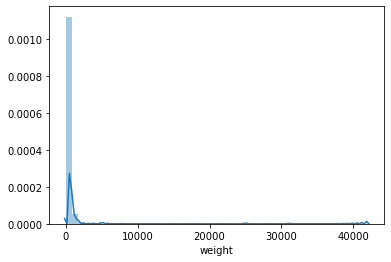

In [11]:
sns.distplot(products.weight.dropna())


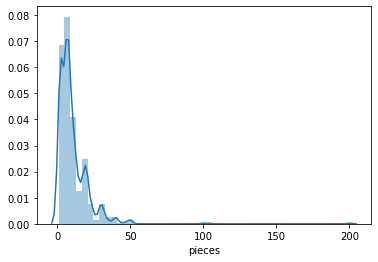

In [12]:
sns.distplot(products.pieces.dropna())


In [13]:
products.short_name.nunique()


1014

In [14]:
import nltk  
# nltk.download() 

In [15]:
from nltk.corpus import stopwords
print(stopwords.words("spanish"))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [16]:
products['short_name_processed'] = (products['short_name']
                                        .map(lambda x: " ".join([i for i in x.lower()
                                                                 .split() if i not in stopwords.words("spanish")])))

In [17]:
products['short_name_processed'].nunique()


992

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 1000) 

product_bag_words = vectorizer.fit_transform(products.short_name_processed).toarray()
product_bag_words.shape

(2592, 795)

In [19]:
vectorizer.get_feature_names()


['abc',
 'abeja',
 'aceite',
 'actifresh',
 'agua',
 'ajn',
 'ajon',
 'ajonj',
 'ajonjoli',
 'alka',
 'almendras',
 'almenuez',
 'almohada',
 'amarant',
 'amaranto',
 'americano',
 'ami',
 'and',
 'angus',
 'animalito',
 'animalitos',
 'apapacho',
 'aparas',
 'arandaleta',
 'arandano',
 'arandanos',
 'arroz',
 'asado',
 'atun',
 'avellanafsa',
 'avena',
 'azucar',
 'azul',
 'ba',
 'bagel',
 'bagels',
 'baguette',
 'bairds',
 'bajio',
 'balcon',
 'banderilla',
 'bar',
 'barbacoa',
 'barra',
 'barras',
 'barri',
 'barrita',
 'barritas',
 'base',
 'baul',
 'bc',
 'bco',
 'bear',
 'bes',
 'besnuez',
 'beso',
 'besos',
 'best',
 'betunadas',
 'bicolor',
 'big',
 'bigotes',
 'bim',
 'bimbo',
 'bimbocontig',
 'bimbollos',
 'bimbolunch',
 'bimbotones',
 'bimbunuelos',
 'bimkingo',
 'bisabor',
 'biscotel',
 'bisquet',
 'bk',
 'blanco',
 'blister',
 'bolillo',
 'bollo',
 'bollos',
 'bolsa',
 'bolsita',
 'bombonete',
 'bon',
 'bran',
 'branfrut',
 'brava',
 'bread',
 'briobalance',
 'brioche',
 '

In [20]:
product_bag_words = pd.concat([products.Producto_ID, 
                               pd.DataFrame(product_bag_words, 
                                            columns= vectorizer.get_feature_names(), index = products.index)], axis=1)
product_bag_words.head()

,Producto_ID,abc,abeja,aceite,actifresh,agua,ajn,ajon,ajonj,ajonjoli,...,wendys,white,whole,wonder,wonderbutter,yerbabuena,you,zarzamora,zarzamoras,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
product_bag_words.drop('Producto_ID', axis=1).sum().sort_values(ascending=False).head(100)

pan         219
fresa       152
duo         101
tubo         98
vainilla     94
           ... 
marias       15
fsa          14
orejitas     14
tira         14
dalmata      14
Length: 100, dtype: int64

In [22]:
df = (pd.merge(agg1.reset_index(), products, on='Producto_ID', how='left').
      groupby('short_name')['Demanda_uni_equil_sum'].sum().sort_values(ascending=False))

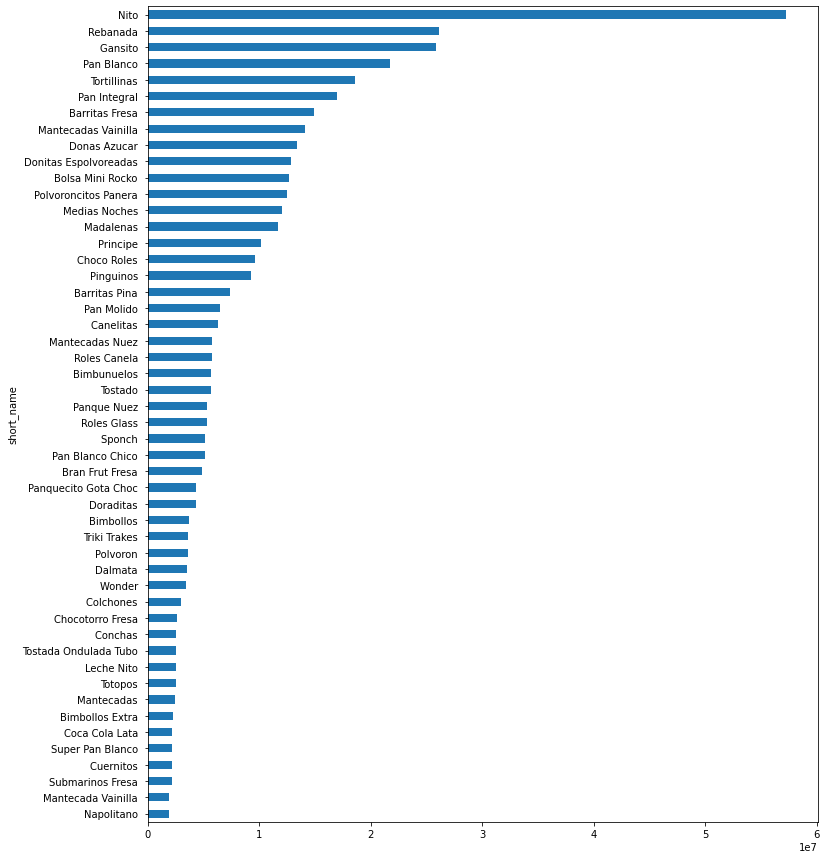

In [23]:
plt.figure(figsize = (12,15))
df.head(50).sort_values().plot(kind='barh')

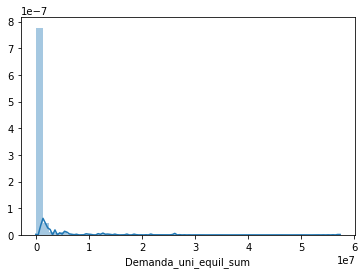

In [24]:
sns.distplot(df)


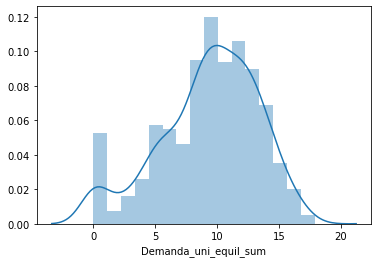

In [25]:
sns.distplot(np.log1p(df))


In [26]:
df = (pd.merge(agg.reset_index(), products, on='Producto_ID', how='left').
      groupby('short_name')['Demanda_uni_equil_sum', 'Venta_uni_hoy_sum', 'Dev_uni_proxima_sum', 'Dev_uni_proxima_count']
      .sum().sort_values(by = 'Demanda_uni_equil_sum', ascending=False))

<ipython-input-26-20c92f4a87ea>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = (pd.merge(agg.reset_index(), products, on='Producto_ID', how='left').


In [27]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Demanda_uni_equil_sum,716.0,748493.729050,3.268453e+06,0.0,958.50,18352.5,194902.25,57205818.0
Venta_uni_hoy_sum,716.0,757362.175978,3.295051e+06,0.0,1047.50,18927.0,201415.50,57569345.0
Dev_uni_proxima_sum,716.0,13495.215084,4.278629e+04,0.0,17.50,465.5,6409.50,496495.0
Dev_uni_proxima_count,716.0,103604.000000,3.554669e+05,1.0,45.75,954.0,14759.00,3068521.0


In [28]:
df[df.Demanda_uni_equil_sum == 0].count()


Demanda_uni_equil_sum    32
Venta_uni_hoy_sum        32
Dev_uni_proxima_sum      32
Dev_uni_proxima_count    32
dtype: int64

In [29]:
df[df.Demanda_uni_equil_sum == 0]


,Demanda_uni_equil_sum,Venta_uni_hoy_sum,Dev_uni_proxima_sum,Dev_uni_proxima_count
short_name,,,,
Max Two Pack Elote Mango,0,0,7,1
Combo Tost Clas mas Frijol,0,0,47,2
Surtido,0,0,446,1
Two Pack Classicas AvellanaFsa,0,0,3,1
Mentho Plus Miel,0,200,623,3
Clasicas de Regalo Sabor Chocol,0,0,3,2
Orejas,0,0,10,7
Lata Butter,0,0,22,1
Pan Tost Silueta,0,0,5,1


In [30]:
df[df.Venta_uni_hoy_sum == 0]


,Demanda_uni_equil_sum,Venta_uni_hoy_sum,Dev_uni_proxima_sum,Dev_uni_proxima_count
short_name,,,,
Max Two Pack Elote Mango,0,0,7,1
Combo Tost Clas mas Frijol,0,0,47,2
Surtido,0,0,446,1
Two Pack Classicas AvellanaFsa,0,0,3,1
Clasicas de Regalo Sabor Chocol,0,0,3,2
Orejas,0,0,10,7
Lata Butter,0,0,22,1
Pan Tost Silueta,0,0,5,1
Galleta Confeti,0,0,13,3


In [31]:
df[df.Dev_uni_proxima_sum == 0].count()


Demanda_uni_equil_sum    106
Venta_uni_hoy_sum        106
Dev_uni_proxima_sum      106
Dev_uni_proxima_count    106
dtype: int64

In [32]:
df[df.Dev_uni_proxima_sum == 0].head(20)


,Demanda_uni_equil_sum,Venta_uni_hoy_sum,Dev_uni_proxima_sum,Dev_uni_proxima_count
short_name,,,,
Bollos Quarter Pounder McD,39372,39372,0,920
Bollo Regular,31628,31628,0,917
Bollo Big Mac,22503,22503,0,914
Principe Mix,20540,20540,0,95
Sand Clasico Multigrano Cong,20162,20162,0,20
Mini Milk Chococat Valentines,17936,17936,0,181
Bollos Wendys,16952,16952,0,124
Bollo Angus McDonalds,16192,16192,0,7
Bollo Random Wendys,14961,14961,0,126


In [33]:
df['Q'] = pd.qcut(df.Demanda_uni_equil_sum, 10)
df.Q.value_counts()

(-0.001, 49.0]             73
(1283696.0, 57205818.0]    72
(135612.0, 336878.0]       72
(18352.5, 44981.0]         72
(2710.5, 7664.0]           72
(336878.0, 1283696.0]      71
(44981.0, 135612.0]        71
(7664.0, 18352.5]          71
(415.0, 2710.5]            71
(49.0, 415.0]              71
Name: Q, dtype: int64

In [34]:
df[df.Q == '[0, 49]'].index.values


array([], dtype=object)

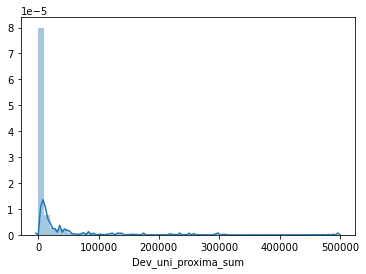

In [35]:
sns.distplot(df.Dev_uni_proxima_sum)


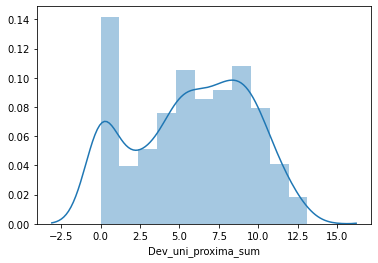

In [36]:
sns.distplot(np.log1p(df.Dev_uni_proxima_sum))



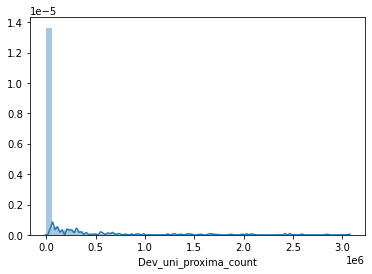

In [37]:
sns.distplot(df.Dev_uni_proxima_count)


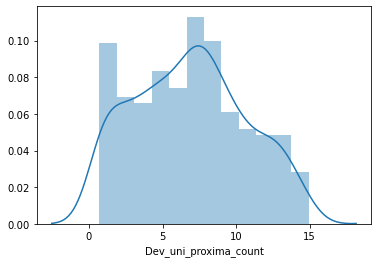

In [38]:
sns.distplot(np.log1p(df.Dev_uni_proxima_count))


In [39]:
df_hmp = (pd.merge(agg.reset_index(), products, on='Producto_ID', how='left').
      groupby(['Semana','short_name'])['Demanda_uni_equil_sum', 'Venta_uni_hoy_sum', 'Dev_uni_proxima_sum', 'Dev_uni_proxima_count'].sum().reset_index())

<ipython-input-39-a236f428d22c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_hmp = (pd.merge(agg.reset_index(), products, on='Producto_ID', how='left').


In [40]:
df_hmp.head()


,Semana,short_name,Demanda_uni_equil_sum,Venta_uni_hoy_sum,Dev_uni_proxima_sum,Dev_uni_proxima_count
0,3,,26952,27249,431,818
1,3,ActiFresh Menta,4140,4511,466,60
2,3,ActiFresh Yerbabuena,3821,4120,489,60
3,3,Agua Ciel Jamaica,5838,5962,137,205
4,3,Agua Ciel Limon,5752,5943,207,200


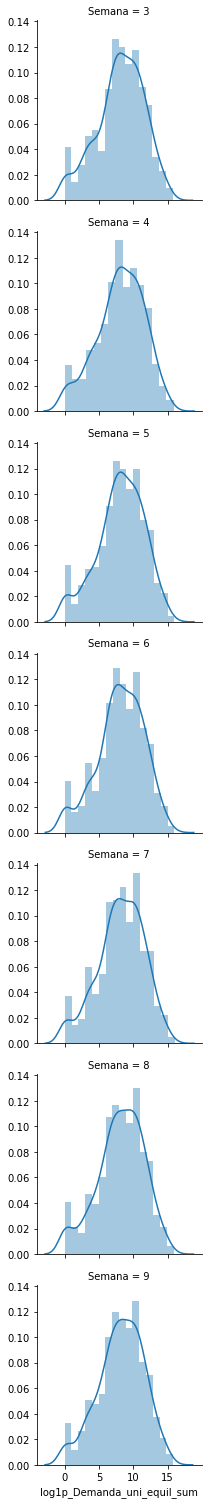

In [41]:
df_hmp['log1p_Demanda_uni_equil_sum'] = np.log1p(df_hmp.Demanda_uni_equil_sum)
g = sns.FacetGrid(df_hmp, row = 'Semana')
g = g.map(sns.distplot, 'log1p_Demanda_uni_equil_sum')